In [22]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
from matplotlib import style
style.use('seaborn-pastel')
import pandas as pd
import random 
import seaborn as sns
import os
from sklearn.model_selection import train_test_split

from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

from tqdm import tqdm_notebook

from albumentations import (
    HorizontalFlip, IAAPerspective, ShiftScaleRotate, CLAHE, RandomRotate90,
    Transpose, ShiftScaleRotate, Blur, OpticalDistortion, GridDistortion, HueSaturationValue,
    IAAAdditiveGaussianNoise, GaussNoise, MotionBlur, MedianBlur, RandomBrightnessContrast, 
    IAAPiecewiseAffine, IAASharpen, IAAEmboss, Flip, OneOf, Compose, Rotate, ElasticTransform
)
import pickle
from PIL import Image

Mounted at /content/gdrive


In [0]:
loaded_data = np.load('/content/gdrive/My Drive/Colab Notebooks/AML/data.npz')
imgs = loaded_data['imgs']
labels = loaded_data['labels']

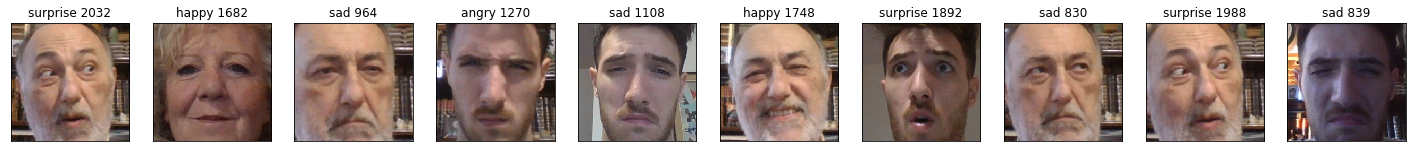

In [3]:
plt.figure(figsize=(25, 8))
nimages = 10 
for i in range(nimages):
    ax = plt.subplot(2, nimages, i + 1)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    l = random.randint(0, len(labels))
    plt.imshow(cv.cvtColor(imgs[l], cv.COLOR_BGR2RGB))
    plt.title(str(labels[l])+' '+str(l))

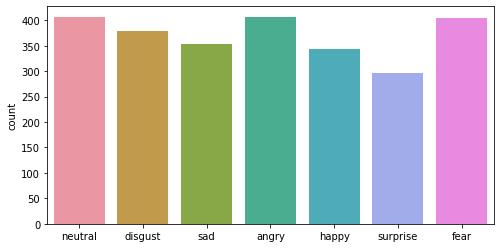

In [4]:
plt.figure(figsize = (8,4))
sns.countplot(labels)

# Split Data

---



In [0]:
SEED = 42
np.random.seed(SEED)

In [6]:
x_train, x_test, y_train, y_test = train_test_split(imgs, labels, test_size = .2, random_state = SEED, stratify = labels)
print('Shape del training set: {} --- {}\nShape del test set: {} --- {}'. format(x_train.shape, y_train.shape, x_test.shape, y_test.shape))

Shape del training set: (2072, 224, 224, 3) --- (2072,)
Shape del test set: (518, 224, 224, 3) --- (518,)


In [7]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = .2, random_state = SEED, stratify = y_train)
print('Shape del training set: {} --- {}\nShape del validation set: {} --- {}'. format(x_train.shape, y_train.shape, x_val.shape, y_val.shape))

Shape del training set: (1657, 224, 224, 3) --- (1657,)
Shape del test set: (415, 224, 224, 3) --- (415,)


# Data Augmentation

---



In [0]:
def augment(aug, image):
    return aug(image=image)['image']

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  if sys.path[0] == '':


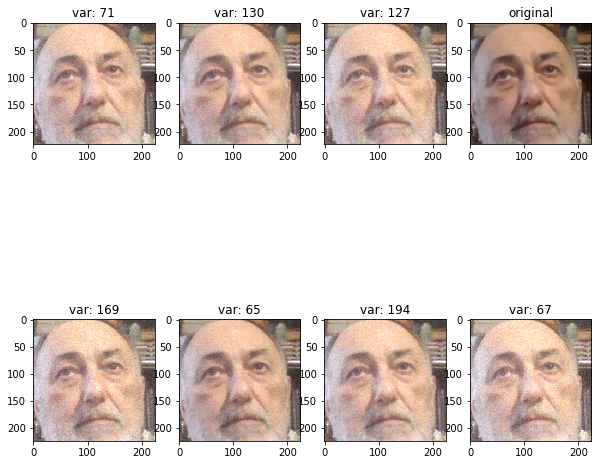

In [9]:
plt.figure(figsize = (10,10))
col = 4
row = 2
flag = 0
noise = GaussNoise(var_limit = (50,200), p = 1)
for i in range(col*row):
  i += 1
  plt.subplot(row, col, i)
  plt.imshow(cv.cvtColor(augment(noise, imgs[42]), cv.COLOR_BGR2RGB))
  plt.gca().set_title('var: {}'.format(noise.get_params()['var']))
  if i == col:
    plt.subplot(row, col, i)
    plt.imshow(cv.cvtColor(imgs[42], cv.COLOR_BGR2RGB))
    plt.gca().set_title('original')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  if sys.path[0] == '':


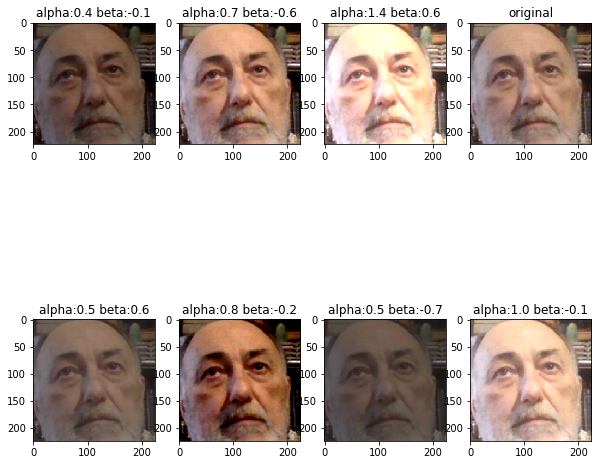

In [10]:
plt.figure(figsize = (10,10))
col = 4
row = 2
flag = 0
brightness = RandomBrightnessContrast(p=1, brightness_limit = 0.7, contrast_limit = 0.7)
for i in range(col*row):
  i += 1
  plt.subplot(row, col, i)
  plt.imshow(cv.cvtColor(augment(brightness, imgs[42]), cv.COLOR_BGR2RGB))
  plt.gca().set_title('alpha:{} beta:{}'.format(round(brightness.get_params()['alpha'],1), round(brightness.get_params()['beta'], 1)))
  if i == col:
    plt.subplot(row, col, i)
    plt.imshow(cv.cvtColor(imgs[42], cv.COLOR_BGR2RGB))
    plt.gca().set_title('original')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  if sys.path[0] == '':


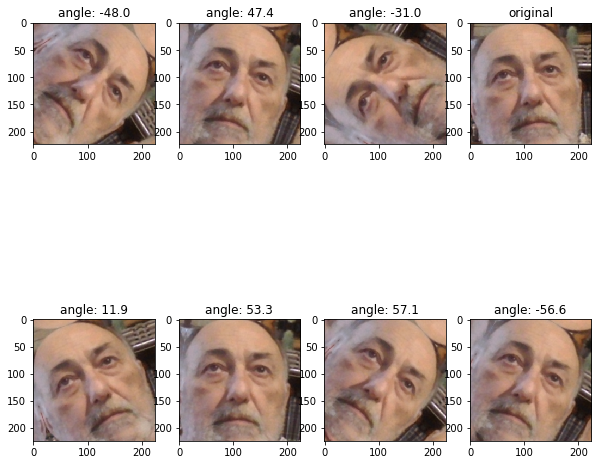

In [11]:
plt.figure(figsize = (10,10))
col = 4
row = 2
flag = 0
rotate = Rotate(p = 1, limit = (60))
for i in range(col*row):
  i += 1
  plt.subplot(row, col, i)
  plt.imshow(cv.cvtColor(augment(rotate, imgs[42]), cv.COLOR_BGR2RGB))
  plt.gca().set_title('angle: {}'.format(round(rotate.get_params()['angle'],1)))
  if i == col:
    plt.subplot(row, col, i)
    plt.imshow(cv.cvtColor(imgs[42], cv.COLOR_BGR2RGB))
    plt.gca().set_title('original')

In [0]:
im = x_train.tolist()

In [0]:
lab = y_train.tolist()

In [14]:
for i in tqdm_notebook(range(len(im))):
  prob = random.uniform(0, 1)
  if prob > 0.7:
    choice = random.choice([1,2,3])
    if choice == 1:
      im.append(augment(noise, x_train[i]))
      lab.append(y_train[i])
    if choice == 2:
      im.append(augment(brightness, x_train[i]))
      lab.append(y_train[i])
    if choice == 3:
      im.append(augment(rotate, x_train[i]))
      lab.append(y_train[i])

In [0]:
x_train = np.array(im)
del im
y_train = np.array(lab)
del lab

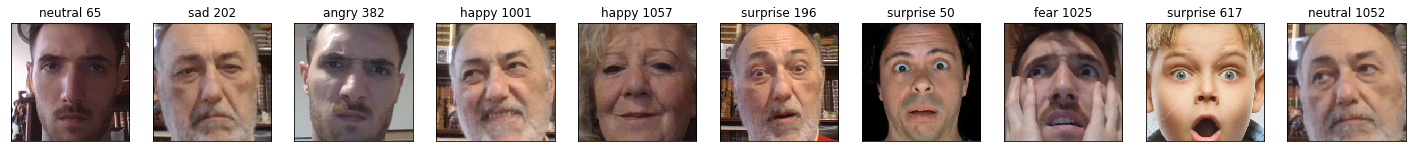

In [31]:
plt.figure(figsize=(25, 8))
nimages = 10 
for i in range(nimages):
    ax = plt.subplot(2, nimages, i + 1)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    l = random.randint(0, len(y_train))
    plt.imshow(x_train[l][:,:,::-1])
    plt.title(str(y_train[l])+' '+str(l))

In [19]:
print('Shape del training set: {} --- {}\nShape del validation set: {} --- {}\nShape del test set: {} --- {}'. format(x_train.shape, y_train.shape,
                                                                                                                 x_val.shape, y_val.shape,
                                                                                                                 x_test.shape, y_test.shape))

Shape del training set: (2157, 224, 224, 3) --- (2157,)
Shape del validation set: (415, 224, 224, 3) --- (415,)
Shape del test set: (518, 224, 224, 3) --- (518,)


In [0]:
# save all data
np.savez_compressed('/content/gdrive/My Drive/Colab Notebooks/AML/data_aug_complete.npz',
                    x_train = x_train, y_train = y_train,
                    x_val = x_val, y_val = y_val,
                    x_test = x_test, y_test = y_test)